In [1]:
from nn_architectures import Model4_1
from utils import *
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np

# Loading and Preprocessing Data

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

cols_to_drop = ['PassengerId', 'Ticket', 'Name', 'Cabin']
X_train = train_data.drop(cols_to_drop, axis=1).iloc[:, 1:]
y_train = train_data['Survived']
X_test = test_data.drop(cols_to_drop, axis=1)
y_test = pd.read_csv('data/gender_submission.csv').drop('PassengerId', axis=1)

In [3]:
embarked_labels = X_train['Embarked'].unique().copy()
sex_labels = X_train['Sex'].unique().copy()

for x in [X_train, X_test]:
    x.dropna(inplace=True)
    x['Embarked'] = x['Embarked'].map({e: i for i, e in enumerate(embarked_labels)})
    x['Sex'] = x['Sex'].map({e: i for i, e in enumerate(sex_labels)})

y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]

In [4]:
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32).unsqueeze(dim=1)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), shuffle=False)

# Training Model 4-1

### Model 4-1-1
- learning rate = 1e-3
- epoch 5000
- batch size = 64

Epoch 4999: Batch Loss - 1.238492488861084                     

Accuracy: 0.7704
Recall: 0.7323
Precision: 0.6889
F1: 0.7099


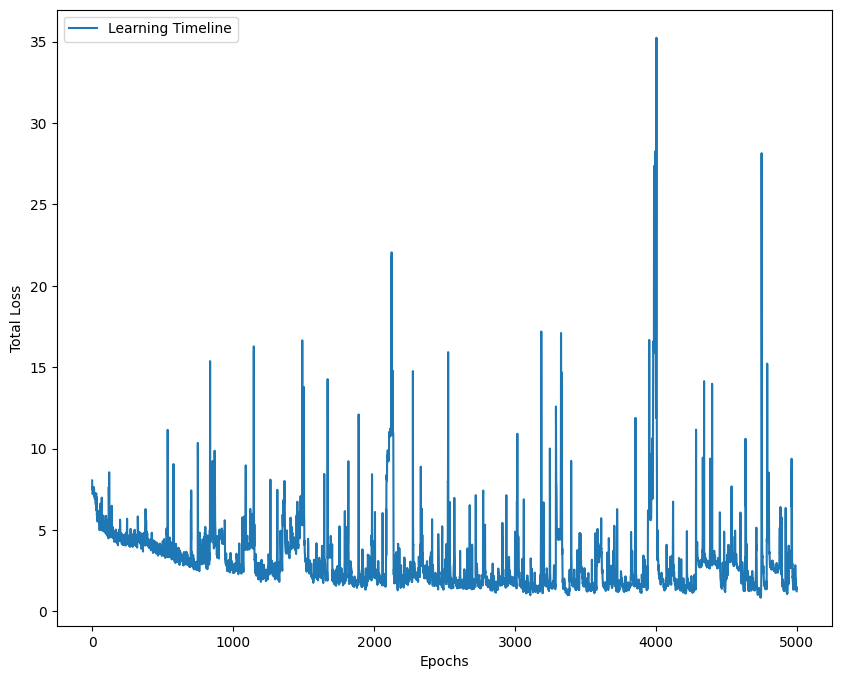

In [5]:
evaluate_model(Model4_1(X_train.shape[1]), train_loader, 1e-3, X_test, y_test, 5000, 'model4_1_1-adam') 

### Model 4-1-2
- learning rate = 1e-6
- epoch = 5000
- batch size = 64

Epoch 4999: Batch Loss - 4.377676963806152                     

Accuracy: 0.8912
Recall: 0.8504
Precision: 0.8640
F1: 0.8571


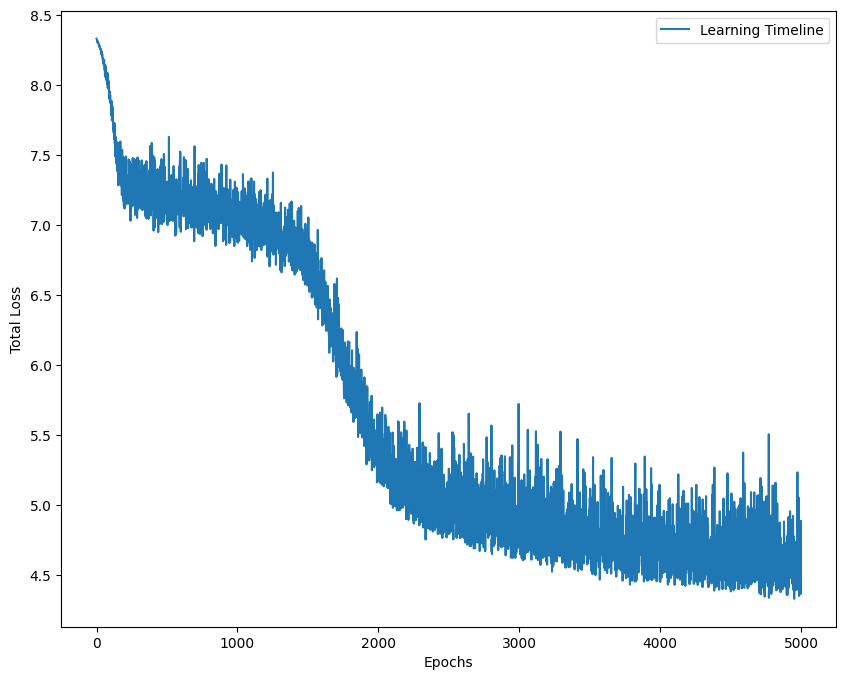

In [6]:
evaluate_model(Model4_1(X_train.shape[1]), train_loader, 1e-6, X_test, y_test, 5000, 'model4_1_2-adam')

### Model 4-1-3
- learning rate = 1e-8
- epoch = 5000
- batch size = 64

Epoch 4999: Batch Loss - 8.170845985412598                    

Accuracy: 0.6284
Recall: 0.2677
Precision: 0.5312
F1: 0.3560


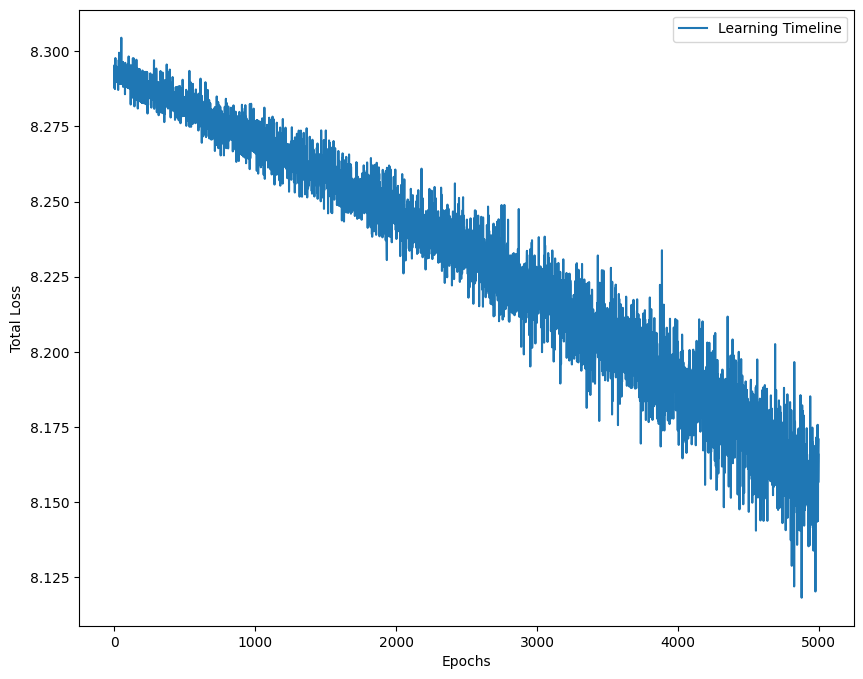

In [7]:
evaluate_model(Model4_1(X_train.shape[1]), train_loader, 1e-8, X_test, y_test, 5000, 'model4_1_3-adam')